<a href="https://colab.research.google.com/github/bhavana957/OIBSIP/blob/main/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1 : Iris Flower Classification

Iris flower has three species: Setosa, Versicolor, and Virginica, which differs according to their measurements.
Now assume that you have the measurements of the iris flowers according to their species,
and here the task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt



LOADING THE IRIS DATASET

In [3]:
iris=pd.read_csv('/content/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Checking for NULL values in the dataset iris

In [6]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Checking the dataset whether it is biased or not

In [8]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Checking the Statistical features

In [9]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Data Visualization

1. By Scatterplot

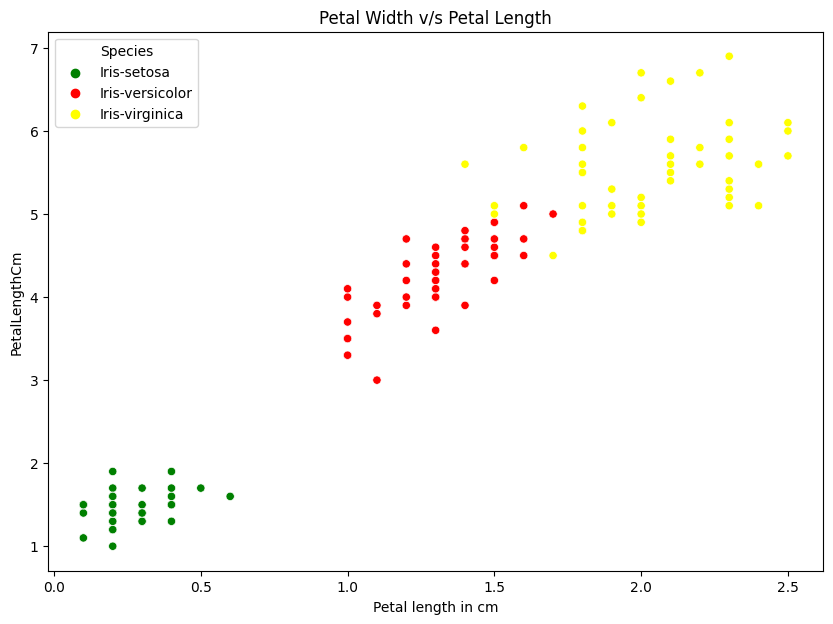

In [13]:
plt.figure(figsize=(10,7))
sea.scatterplot(data=iris,x="PetalWidthCm",y="PetalLengthCm", hue="Species", palette=['green','red','yellow'])
plt.title('Petal Width v/s Petal Length')
plt.xlabel('Petal width in cm')
plt.xlabel('Petal length in cm')
plt.show()


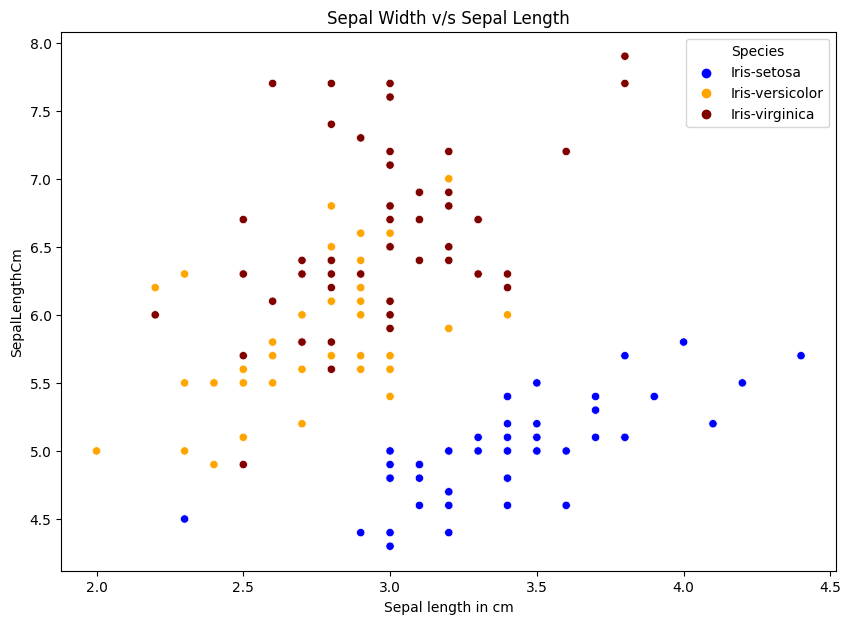

In [15]:
plt.figure(figsize=(10,7))
sea.scatterplot(data=iris,x="SepalWidthCm",y="SepalLengthCm", hue="Species", palette=['blue','orange','maroon'])
plt.title('Sepal Width v/s Sepal Length')
plt.xlabel('Sepal width in cm')
plt.xlabel('Sepal length in cm')
plt.show()

From the scatterplots, we can understand that petal features are clustered thereby giving a classification amongst the species.

2. By Correlation Matrix

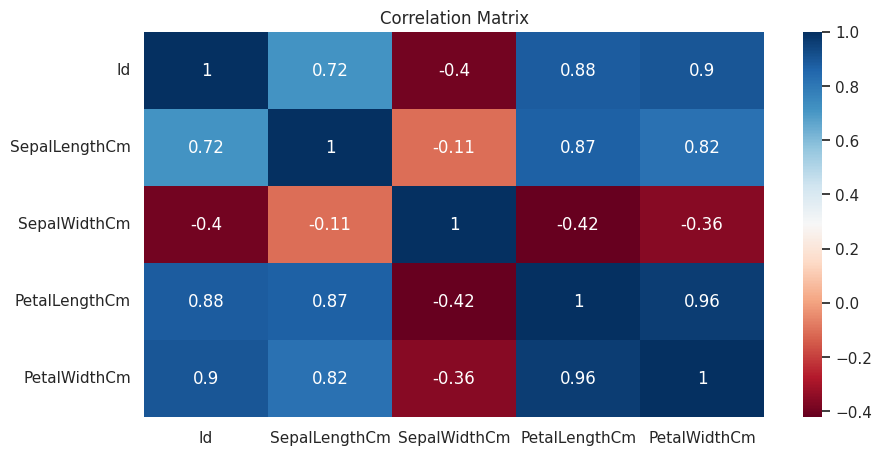

In [18]:
plt.figure(figsize=(10,5))
sea.set(style="whitegrid")

corrmatrix=iris.corr(numeric_only="True")
sea.heatmap(corrmatrix, annot=True, cmap="RdBu")

plt.title("Correlation Matrix")
plt.show()

here, the petal length and petal width are highly correlated

NOW SEPARATING INPUT COLUMNS AND OUTPUT COLUMNS FOR ANALYSIS

In [25]:
data=iris.values  #separating features & targets

#slicing the matrices
X=data[:,0:4]
Y=data[:,5]


In [23]:
print(X.shape)
print(X)

(150, 4)
[[1 5.1 3.5 1.4]
 [2 4.9 3.0 1.4]
 [3 4.7 3.2 1.3]
 [4 4.6 3.1 1.5]
 [5 5.0 3.6 1.4]
 [6 5.4 3.9 1.7]
 [7 4.6 3.4 1.4]
 [8 5.0 3.4 1.5]
 [9 4.4 2.9 1.4]
 [10 4.9 3.1 1.5]
 [11 5.4 3.7 1.5]
 [12 4.8 3.4 1.6]
 [13 4.8 3.0 1.4]
 [14 4.3 3.0 1.1]
 [15 5.8 4.0 1.2]
 [16 5.7 4.4 1.5]
 [17 5.4 3.9 1.3]
 [18 5.1 3.5 1.4]
 [19 5.7 3.8 1.7]
 [20 5.1 3.8 1.5]
 [21 5.4 3.4 1.7]
 [22 5.1 3.7 1.5]
 [23 4.6 3.6 1.0]
 [24 5.1 3.3 1.7]
 [25 4.8 3.4 1.9]
 [26 5.0 3.0 1.6]
 [27 5.0 3.4 1.6]
 [28 5.2 3.5 1.5]
 [29 5.2 3.4 1.4]
 [30 4.7 3.2 1.6]
 [31 4.8 3.1 1.6]
 [32 5.4 3.4 1.5]
 [33 5.2 4.1 1.5]
 [34 5.5 4.2 1.4]
 [35 4.9 3.1 1.5]
 [36 5.0 3.2 1.2]
 [37 5.5 3.5 1.3]
 [38 4.9 3.1 1.5]
 [39 4.4 3.0 1.3]
 [40 5.1 3.4 1.5]
 [41 5.0 3.5 1.3]
 [42 4.5 2.3 1.3]
 [43 4.4 3.2 1.3]
 [44 5.0 3.5 1.6]
 [45 5.1 3.8 1.9]
 [46 4.8 3.0 1.4]
 [47 5.1 3.8 1.6]
 [48 4.6 3.2 1.4]
 [49 5.3 3.7 1.5]
 [50 5.0 3.3 1.4]
 [51 7.0 3.2 4.7]
 [52 6.4 3.2 4.5]
 [53 6.9 3.1 4.9]
 [54 5.5 2.3 4.0]
 [55 6.5 2.8 4.6]
 [56 5.7 2

In [26]:
print(Y.shape)
print(Y)

(150,)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-ver

SPLITTING OF DATA INTO TRAINNG AND TESTING

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)
 #here we took a size of 0.2 that means 20% of dataset will be used in testing and the training data will be of 80%

In [30]:
print(X_train.shape)
print(X_train)

(120, 4)
[[140 6.9 3.1 5.4]
 [53 6.9 3.1 4.9]
 [143 5.8 2.7 5.1]
 [27 5.0 3.4 1.6]
 [73 6.3 2.5 4.9]
 [144 6.8 3.2 5.9]
 [15 5.8 4.0 1.2]
 [65 5.6 2.9 3.6]
 [132 7.9 3.8 6.4]
 [83 5.8 2.7 3.9]
 [71 5.9 3.2 4.8]
 [32 5.4 3.4 1.5]
 [36 5.0 3.2 1.2]
 [18 5.1 3.5 1.4]
 [110 7.2 3.6 6.1]
 [10 4.9 3.1 1.5]
 [50 5.0 3.3 1.4]
 [74 6.1 2.8 4.7]
 [75 6.4 2.9 4.3]
 [38 4.9 3.1 1.5]
 [63 6.0 2.2 4.0]
 [12 4.8 3.4 1.6]
 [11 5.4 3.7 1.5]
 [128 6.1 3.0 4.9]
 [129 6.4 2.8 5.6]
 [52 6.4 3.2 4.5]
 [139 6.0 3.0 4.8]
 [148 6.5 3.0 5.2]
 [109 6.7 2.5 5.8]
 [108 7.3 2.9 6.3]
 [111 6.5 3.2 5.1]
 [61 5.0 2.0 3.5]
 [104 6.3 2.9 5.6]
 [57 6.3 3.3 4.7]
 [135 6.1 2.6 5.6]
 [69 6.2 2.2 4.5]
 [6 5.4 3.9 1.7]
 [31 4.8 3.1 1.6]
 [76 6.6 3.0 4.4]
 [147 6.3 2.5 5.0]
 [29 5.2 3.4 1.4]
 [72 6.1 2.8 4.0]
 [55 6.5 2.8 4.6]
 [48 4.6 3.2 1.4]
 [145 6.7 3.3 5.7]
 [126 7.2 3.2 6.0]
 [103 7.1 3.0 5.9]
 [114 5.7 2.5 5.0]
 [87 6.7 3.1 4.7]
 [68 5.8 2.7 4.1]
 [86 6.0 3.4 4.5]
 [131 7.4 2.8 6.1]
 [97 5.7 2.9 4.2]
 [37 5.5 3.5 1.3]


In [31]:
print(Y_train.shape)
print(Y_train)

(120,)
['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' '

In [32]:
print(X_test.shape)
print(X_test)

(30, 4)
[[116 6.4 3.2 5.3]
 [46 4.8 3.0 1.4]
 [17 5.4 3.9 1.3]
 [88 6.3 2.3 4.4]
 [146 6.7 3.0 5.2]
 [43 4.4 3.2 1.3]
 [100 5.7 2.8 4.1]
 [112 6.4 2.7 5.3]
 [19 5.7 3.8 1.7]
 [35 4.9 3.1 1.5]
 [98 6.2 2.9 4.3]
 [133 6.4 2.8 5.6]
 [99 5.1 2.5 3.0]
 [40 5.1 3.4 1.5]
 [70 5.6 2.5 3.9]
 [89 5.6 3.0 4.1]
 [39 4.4 3.0 1.3]
 [8 5.0 3.4 1.5]
 [134 6.3 2.8 5.1]
 [125 6.7 3.3 5.7]
 [138 6.4 3.1 5.5]
 [141 6.7 3.1 5.6]
 [41 5.0 3.5 1.3]
 [90 5.5 2.5 4.0]
 [47 5.1 3.8 1.6]
 [82 5.5 2.4 3.7]
 [22 5.1 3.7 1.5]
 [123 7.7 2.8 6.7]
 [51 7.0 3.2 4.7]
 [23 4.6 3.6 1.0]]


In [33]:
print(Y_test.shape)
print(Y_test)

(30,)
['Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa']


Building Models

1. Support Vector Machine algorithm

In [41]:
from sklearn.svm import SVC
model_1=SVC()
model_1.fit(X_train,Y_train)

SVC()

In [42]:
predict_1=model_1.predict(X_test)

#accuracy check
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predict_1))

0.9333333333333333


from this we obtain 93.333% accuracy

2. Decision Tree Model

In [44]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier()
model_2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [47]:
predict_2=model_2.predict(X_test)

#accuracy check
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predict_2))

0.9666666666666667


New data for prediction

In [71]:
X_new=np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
#predicting the new sizes for iris flowes
predicted_sizes=model_2.predict(X_new)
print(predicted_sizes)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa']


3. KNN Model

In [49]:
from sklearn.neighbors import KNeighborsClassifier

model_3=KNeighborsClassifier(n_neighbors=3)
model_3.fit(X_train,Y_train)



KNeighborsClassifier(n_neighbors=3)

In [50]:
predict_3=model_3.predict(X_test)

#accuracy check
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predict_3))

0.9666666666666667


4. Logistic Regression

In [56]:
#converting categorical variables into numbers
flower_map={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['Species']=iris['Species'].map(flower_map)

In [57]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [58]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [59]:
X=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
Y=iris[['Species']].values

In [60]:
from sklearn.linear_model import LogisticRegression

model_4=LogisticRegression()
model_4.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [62]:
model_4.score(X,Y)

0.9733333333333334

here, we got 97.33% accuracy

Making a prediction for the data

In [64]:
expected=Y
predicted=model_4.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
#summarizing the fit of the model

from sklearn import metrics
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



0 : Iris-Setosa 1:Iris-versicolor 2:Iris-Virginica

In [67]:
#confusion matrix
print(metrics.confusion_matrix(expected,predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


Here, we can conclude that Setosa predicted for all 50 columns in the first row, Versicolor for 47 and 3 for Virginica in the second row
and 1 for Versicolor and 49 values for Virginica in the third row